In [37]:
import pandas as pd
import numpy as np
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [38]:
data = pd.read_csv(r"C:\Users\Nithin\OneDrive\Desktop\tiru\Mall_Customers.csv")
print(data)

     CustomerID  Gender  Age  Annual Income (k$)  Spending Score (1-100)
0             1    Male   19                  15                      39
1             2    Male   21                  15                      81
2             3  Female   20                  16                       6
3             4  Female   23                  16                      77
4             5  Female   31                  17                      40
..          ...     ...  ...                 ...                     ...
195         196  Female   35                 120                      79
196         197  Female   45                 126                      28
197         198    Male   32                 126                      74
198         199    Male   32                 137                      18
199         200    Male   30                 137                      83

[200 rows x 5 columns]


In [39]:
data.columns

Index(['CustomerID', 'Gender', 'Age', 'Annual Income (k$)',
       'Spending Score (1-100)'],
      dtype='object')

In [40]:
features = [ 'Age', 'Annual Income (k$)', 'Spending Score (1-100)']

In [41]:
X = data[features]

In [42]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)


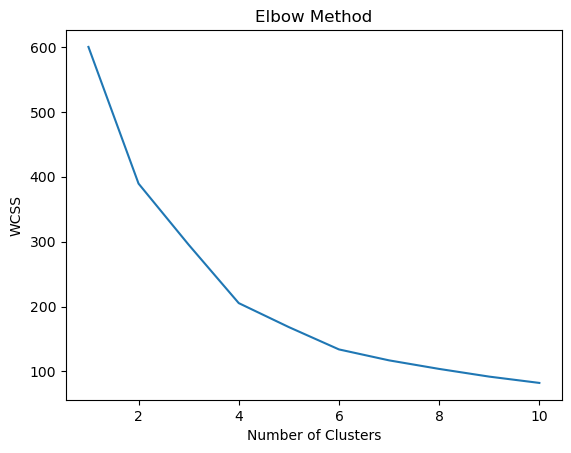

In [43]:
# Determine the optimal number of clusters using the Elbow Method
wcss = []  # Within-Cluster-Sum-of-Squares

for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, init='k-means++', max_iter=300, n_init=10, random_state=0)
    kmeans.fit(X_scaled)
    wcss.append(kmeans.inertia_)

# Plot the Elbow Method graph
plt.plot(range(1, 11), wcss)
plt.title('Elbow Method')
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS')
plt.show()


In [44]:
optimal_clusters = 3

In [45]:
kmeans = KMeans(n_clusters=optimal_clusters, init='k-means++', max_iter=300, n_init=10, random_state=0)
data['Cluster'] = kmeans.fit_predict(X_scaled)


In [46]:
print(data[['CustomerID', 'Age', 'Annual Income (k$)', 'Spending Score (1-100)', 'Cluster']])

     CustomerID  Age  Annual Income (k$)  Spending Score (1-100)  Cluster
0             1   19                  15                      39        2
1             2   21                  15                      81        2
2             3   20                  16                       6        2
3             4   23                  16                      77        2
4             5   31                  17                      40        2
..          ...  ...                 ...                     ...      ...
195         196   35                 120                      79        1
196         197   45                 126                      28        0
197         198   32                 126                      74        1
198         199   32                 137                      18        1
199         200   30                 137                      83        1

[200 rows x 5 columns]


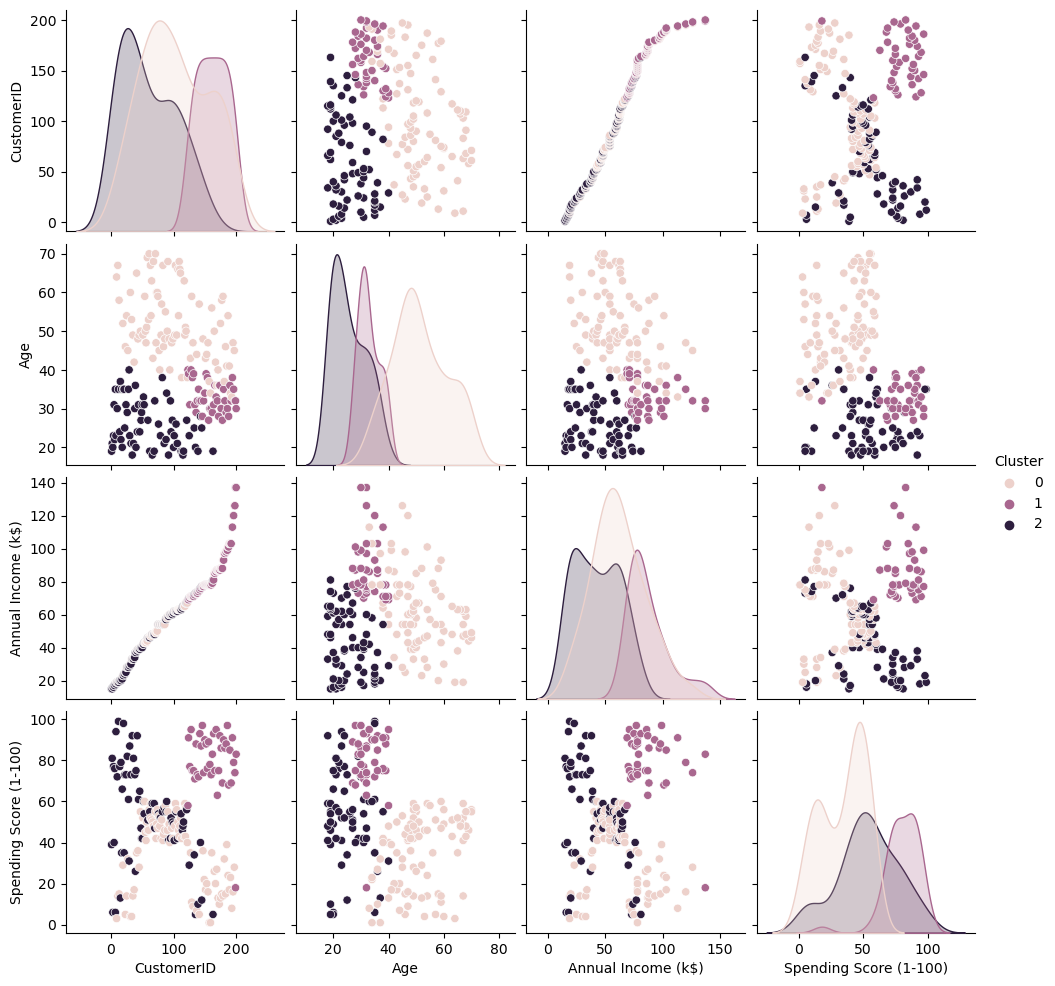

In [47]:
sns.pairplot(data,hue = 'Cluster')
plt.show()